In [ ]:
# The time complexity of decision trees is a function of the number of records
# and attributes in the given data

# This classification is also done on the same Pima Indian Diabetes Dataset

In [ ]:
#Load Liabraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
col_names = ['pregnant','glucose','bp','skin', 'insulin','bmi','pedigree','age','label']

#Load the dataset
df = pd.read_csv('/content/diabetes_dataset.csv', header= None, names = col_names)
df.head(5)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Feature Selection
# Split the dataset in features and target variable
feature_cols = ['pregnant','glucose','bp', 'insulin','bmi','pedigree','age']
X = df[feature_cols] #Features
Y = df.label #Target Variable

In [ ]:
print(X)

     pregnant  glucose  bp  insulin   bmi  pedigree  age
0           6      148  72        0  33.6     0.627   50
1           1       85  66        0  26.6     0.351   31
2           8      183  64        0  23.3     0.672   32
3           1       89  66       94  28.1     0.167   21
4           0      137  40      168  43.1     2.288   33
..        ...      ...  ..      ...   ...       ...  ...
763        10      101  76      180  32.9     0.171   63
764         2      122  70        0  36.8     0.340   27
765         5      121  72      112  26.2     0.245   30
766         1      126  60        0  30.1     0.349   47
767         1       93  70        0  30.4     0.315   23

[768 rows x 7 columns]


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: label, Length: 768, dtype: int64


In [ ]:
# Splitting Data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1)
# 70% Training and 30% Test

In [ ]:
# Building Decision Tree Model

# Define Decision Tree Classifier Object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf = clf.fit(X_train, Y_train)

#Predict the response of the test dataset
Y_pred = clf.predict(X_test)


In [ ]:
# Evaluate the model

#Model Accuaracy(How often is the classifier correct?)
print("Accuracy : ", metrics.accuracy_score(Y_test, Y_pred))

Accuracy :  0.6623376623376623


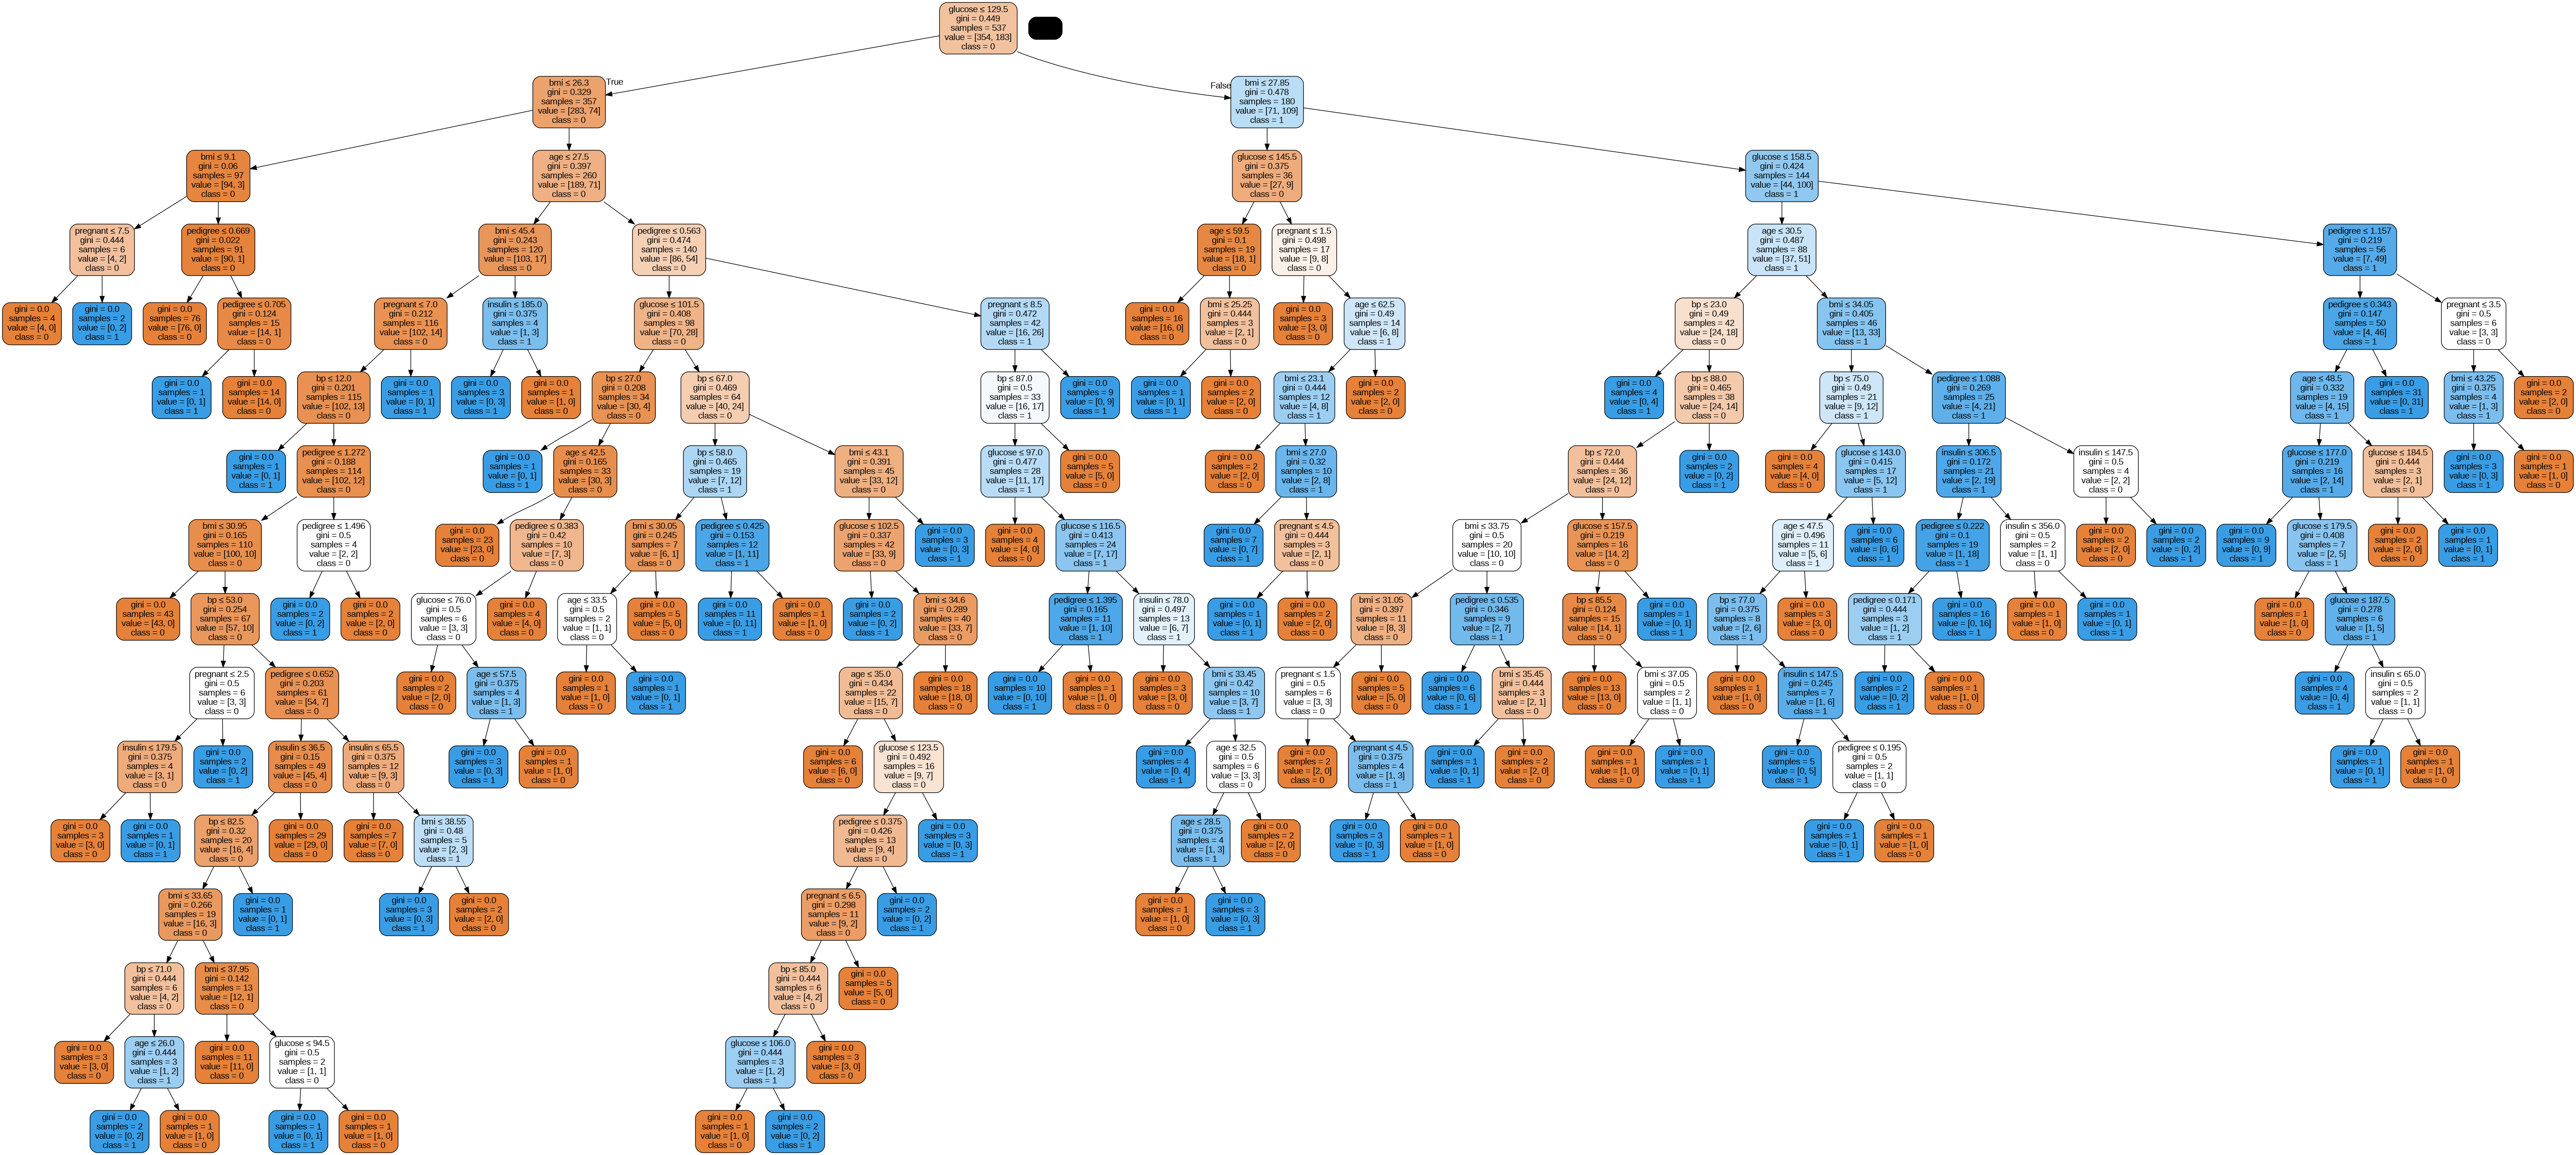

In [21]:
# Visualising Decision Trees
# Import the libraries
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

'''Created a StringIO Object called dot_data to hold text
representation of the decisiont tree.'''
dot_data = StringIO()

# Exported the decision tree to the dot format using the export_graphviz
# Wrote the output to the dot_data file
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True,
                special_characters = True, feature_names = feature_cols,
                class_names = ['0','1'])
# Created a pydotplus object from the dot format representation of the decision
# tree stored in the dot_data buffer
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [22]:
# Optimizing Decision Tree Performance

# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)

# Train Decision Tree Classifier
clf = clf.fit(X_train,Y_train)

# Predict the response for the test data
Y_pred = clf.predict(X_test)

# Model Accuracy
print("Model Accuracy : ", metrics.accuracy_score(Y_test, Y_pred))


Model Accuracy :  0.7705627705627706
